<a href="https://colab.research.google.com/github/sonnylewis1/ML-Zoomcamp/blob/main/ML_Zoomcamp_Week_2_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


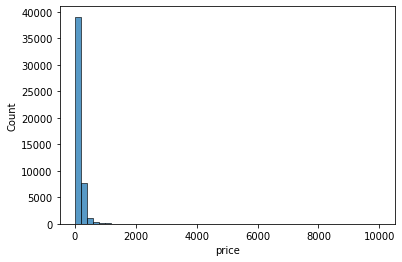

In [4]:
sns.histplot(df.price, bins=50)

In [5]:
df_new = df[[
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]]

**QUESTION 1**

In [6]:
df_new.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**QUESTION 2**

In [7]:
df_new['minimum_nights'].median()

3.0

In [8]:
np.random.seed(42)

In [9]:
n = len(df_new)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [10]:
n_val, n_test, n_train

(9779, 9779, 29337)

In [11]:
idx = np.arange(n)
np.random.shuffle(idx)

In [12]:
df_train = df_new.iloc[idx[:n_train]]
df_val = df_new.iloc[idx[n_train:n_train+n_val]]
df_test = df_new.iloc[idx[n_train+n_val:]]

In [13]:
df_test.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
19797,40.68866,-73.96147,48,20,24,0.78,1,304
39219,40.68554,-73.96651,120,3,3,0.47,1,0
45806,40.76805,-73.94929,150,1,2,2.00,1,83
17290,40.75571,-73.99594,90,15,0,NaN,1,0
45165,40.70780,-74.00675,130,29,0,NaN,327,349


In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [16]:
del df_train['price']
del df_val['price']
del df_test['price']

**QUESTION 3**

In [17]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [18]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [19]:
def prepare_X(df):
    df = df.fillna(0)
    X = df.values
    return X

In [20]:
def prepare_X_mean(df):
    df = df.fillna(df.mean())
    X = df.values
    return X

In [21]:
#FILLING MISSING VALUES WITH 0

X_train = prepare_X(df_train)

In [22]:
w0, w = train_linear_regression(X_train, y_train)

In [23]:
w

array([ 1.30676225e+00, -5.02167854e+00, -5.59803109e-04, -4.07634896e-04,
       -8.25470069e-03,  1.33371320e-03,  6.50203890e-04])

In [24]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)

In [25]:
round(score, 2)

0.64

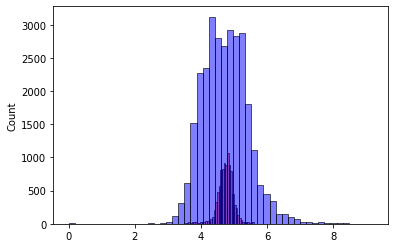

In [26]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [27]:
#FILLING MISSING VALUES WITH MEAN

X_train_mean = prepare_X_mean(df_train)

In [28]:
w0, w = train_linear_regression(X_train_mean, y_train)

In [29]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score_mean = rmse(y_val, y_pred)

In [30]:
round(score_mean, 2)

0.64

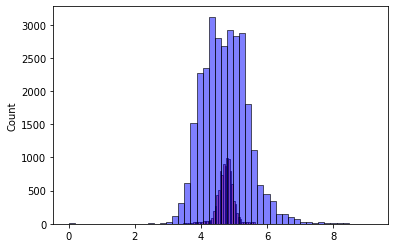

In [31]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

**QUESTION 4**

In [32]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [33]:
r_parameters = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
r_dict = {}
for r in r_parameters:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    r_dict[r] = round(score, 2)

In [35]:
r_dict

{0: 0.64,
 1e-06: 0.64,
 0.0001: 0.64,
 0.001: 0.64,
 0.01: 0.66,
 0.1: 0.68,
 1: 0.68,
 5: 0.68,
 10: 0.68}

**QUESTION 5**

In [39]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
result_dict = {}

for i in seed:
  np.random.seed(i)

  idx = np.arange(n)
  np.random.shuffle(idx)

  df_train = df_new.iloc[idx[:n_train]]
  df_val = df_new.iloc[idx[n_train:n_train+n_val]]
  df_test = df_new.iloc[idx[n_train+n_val:]]

  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  y_train = np.log1p(df_train.price.values)
  y_val = np.log1p(df_val.price.values)
  y_test = np.log1p(df_test.price.values)

  del df_train['price']
  del df_val['price']
  del df_test['price']

  X_train = prepare_X(df_train)

  w0, w = train_linear_regression(X_train, y_train)

  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred)

  result_dict[i] = score

In [40]:
result_dict

{0: 0.6549779961157263,
 1: 0.646252368578719,
 2: 0.6476558177163445,
 3: 0.6375145071233626,
 4: 0.6445809083551755,
 5: 0.6305809996077186,
 6: 0.6297851917617103,
 7: 0.6506184267164312,
 8: 0.6489780353432693,
 9: 0.6437565168302604}

In [54]:
round(np.std(list(result_dict.values())), 3)

0.008

**QUESTION 6**

In [55]:
  np.random.seed(9)

  idx = np.arange(n)
  np.random.shuffle(idx)

  df_train = df_new.iloc[idx[:n_train]]
  df_val = df_new.iloc[idx[n_train:n_train+n_val]]
  df_test = df_new.iloc[idx[n_train+n_val:]]

  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  y_train = np.log1p(df_train.price.values)
  y_val = np.log1p(df_val.price.values)
  y_test = np.log1p(df_test.price.values)

  del df_train['price']
  del df_val['price']
  del df_test['price']

In [56]:
df_full_train = pd.concat([df_train, df_val])

In [57]:
df_full_train = df_full_train.reset_index(drop=True)

In [58]:
X_full_train = prepare_X(df_full_train)

In [59]:
y_full_train = np.concatenate([y_train, y_val])

In [60]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [61]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.6452771348554612